In [1]:
import pandas as pd 
import seaborn as sns 
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv(r'Coffe_sales.csv')
df.head(5)

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000


In [3]:
#data cleaning

df['Date'] =pd.to_datetime(df['Date'],errors='coerce')
df['Time'] =pd.to_datetime(df['Time'],errors='coerce')

print("No. of nulls in date:",df["Date"].isnull().sum())
print("No. of nulls in time:",df['Time'].isnull().sum())

df = df.dropna(subset=['Date','Time'])
df = df.reset_index(drop= True)

category = ['cash_type', 'coffee_name', 'Time_of_Day', 'Weekday', 'Month_name']

for x in category :
    df[x]=df[x].astype(str).str.strip()


df.info()




No. of nulls in date: 0
No. of nulls in time: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   hour_of_day  3547 non-null   int64         
 1   cash_type    3547 non-null   object        
 2   money        3547 non-null   float64       
 3   coffee_name  3547 non-null   object        
 4   Time_of_Day  3547 non-null   object        
 5   Weekday      3547 non-null   object        
 6   Month_name   3547 non-null   object        
 7   Weekdaysort  3547 non-null   int64         
 8   Monthsort    3547 non-null   int64         
 9   Date         3547 non-null   datetime64[ns]
 10  Time         3547 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(3), object(5)
memory usage: 304.9+ KB


C:\Users\rites\AppData\Local\Temp\ipykernel_21920\527657872.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] =pd.to_datetime(df['Time'],errors='coerce')


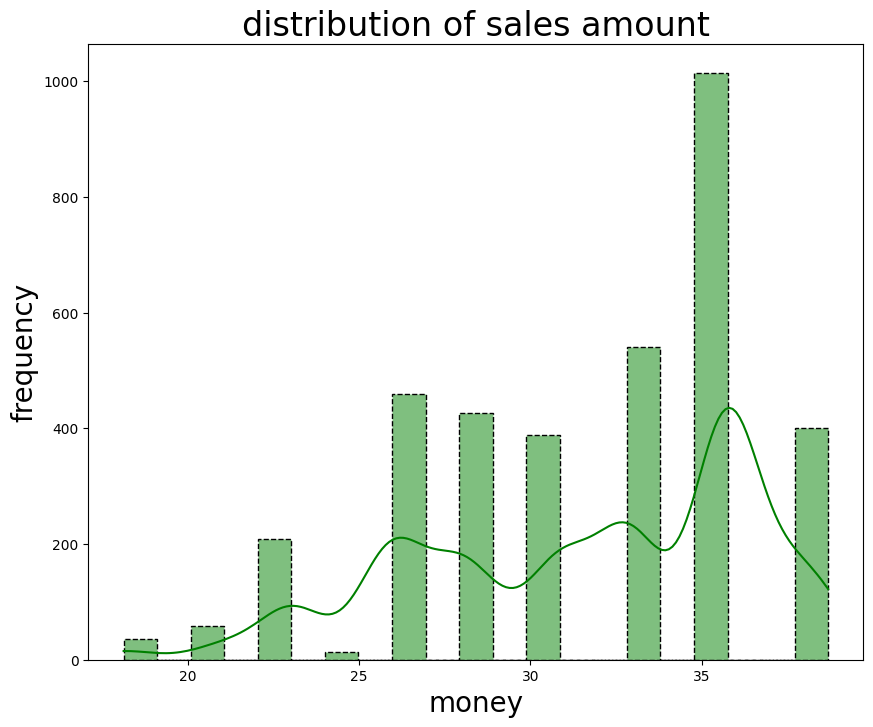

In [4]:
#eda
plt.figure(figsize=(10,8))
sns.histplot(df['money'], kde=True,color='g',linestyle='--')
plt.title('distribution of sales amount', size=24)
plt.xlabel('money',size=20)
plt.ylabel('frequency',size=20)
plt.show()

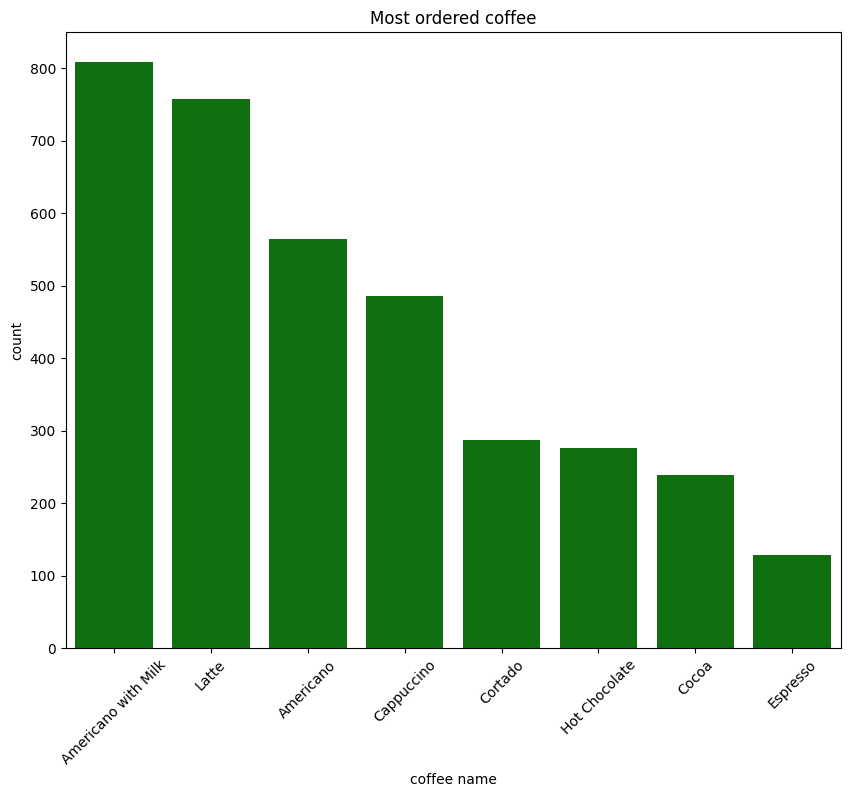

In [5]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,x='coffee_name' ,order=df['coffee_name'].value_counts().index,color='g')
plt.title('Most ordered coffee')
plt.xlabel('coffee name')
plt.ylabel('count')
plt.xticks(rotation=45)
plt.show()

In [9]:
#visualization

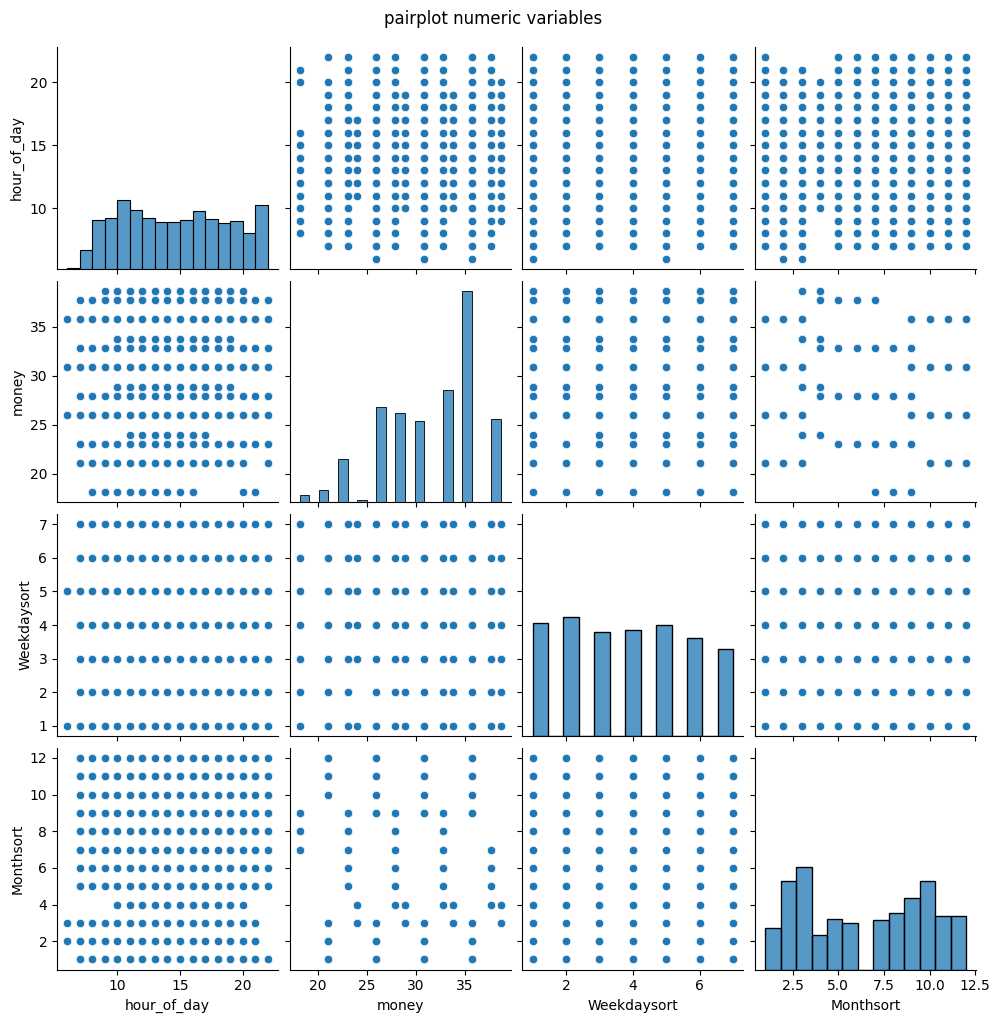

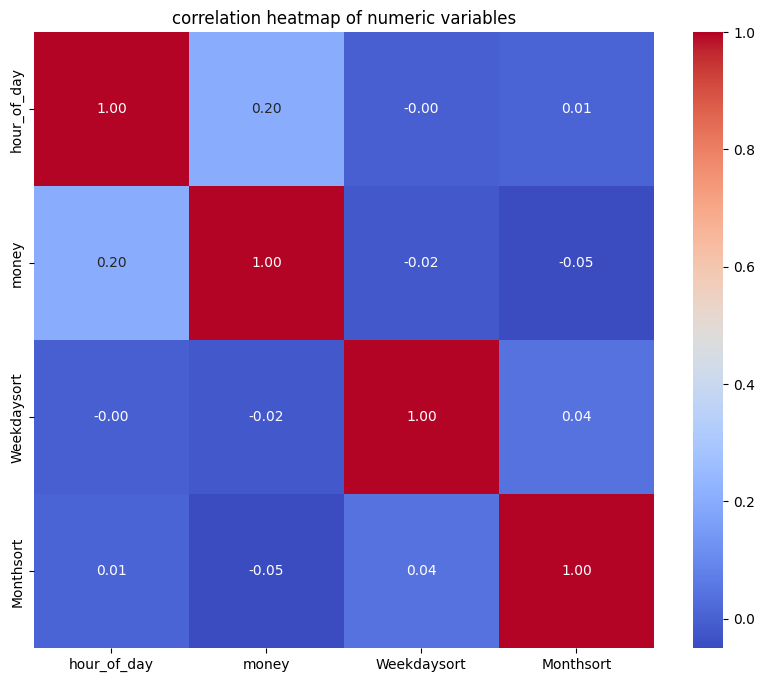

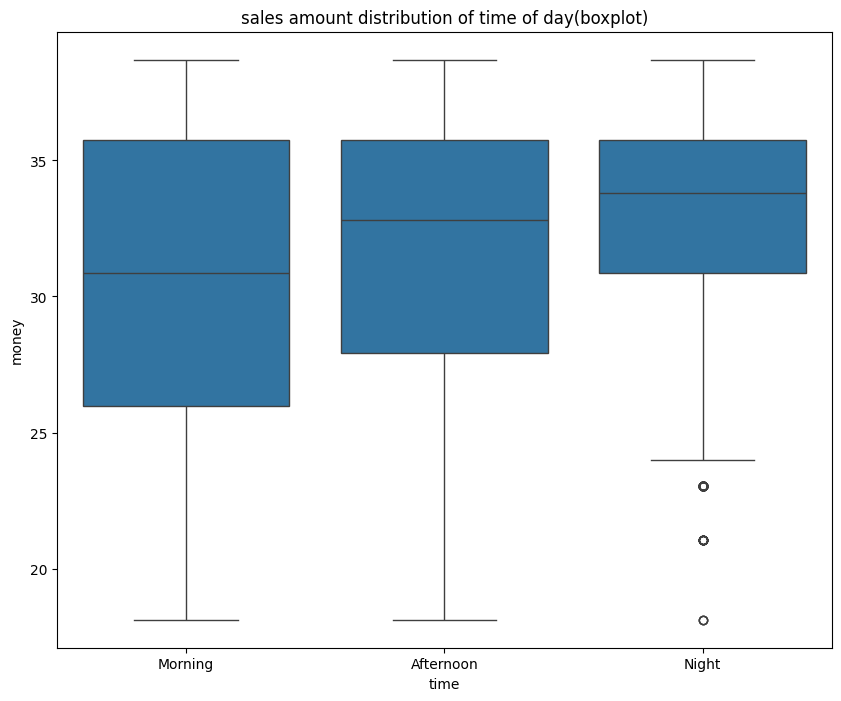

In [19]:
#pairplot
num_df = df.select_dtypes(include=[np.number])
if num_df.shape[1] >=2:
    sns.pairplot(num_df)
    plt.suptitle('pairplot numeric variables',y=1.02)
    plt.show()

#heatmap
if num_df.shape[1]>=4:
    plt.figure(figsize=(10,8))
    corre= num_df.corr()
    sns.heatmap(corr,annot=True,cmap='coolwarm',fmt='.2f')
    plt.title('correlation heatmap of numeric variables')
    plt.show()

# boxplot Purpose: To compare distribution of sales (money) across different times of day.
plt.figure(figsize=(10,8))
sns.boxplot(data=df,x='Time_of_Day',y='money')
plt.title('sales amount distribution of time of day(boxplot)')
plt.xlabel('time')
plt.ylabel('money')
plt.show()

In [21]:
#violin plot of money vs Weekday

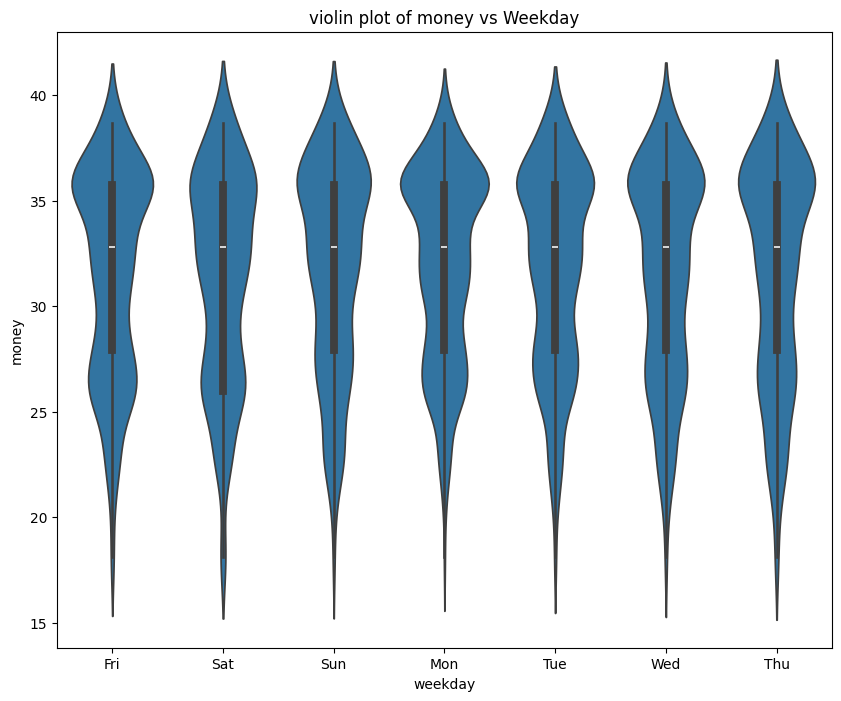

In [24]:
plt.figure(figsize=(10,8))
sns.violinplot(data=df,x='Weekday',y='money')
plt.title("violin plot of money vs Weekday")
plt.xlabel('weekday')
plt.ylabel('money')
plt.show()